# 트리의 앙상블


* 랜덤포레스트 - RandomForestClassifier, randomForestRegression
* 앙상블
    * 단일 모델의 약점을 다수의 모델들을 결합하여 보완
    * 뛰어난 성능을 가진 모델들로만 구성하는 것보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음. 
    * 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정트리 알고리즘을 기반 알고리즘으로 사용. 
    * 앙상블의 유형은 일반적으로 보팅(voting(,배깅(bagging), 부스팅(voosting)으로 구분할 수 있으며, 이외에 스태킹 등의 기법이 있다. 


## 정형 데이터와 비정형 데이터
* 정형데이터(ML): 엑셀, csv
* 비정형데이터(DL): 텍스트, 이미지, 영상, 음성

## 랜덤 포레스트
### 랜덤포레스트 특징
**1) 부스팅-중복된 데이터를 허용**

**2) 랜덤 셀렉션과 피쳐-질문이 랜덤, 가장 좋은 질문이 아닐 수 있다.**

**3) 투표**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [31]:
train_input.shape

(5197, 3)

In [5]:
# return_train_score = True 검증 점수뿐 아니라 훈련세트에 대한 점수도 같이 반환한다. 
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


* 결정 트리처럼 랜덤 포레스트도 특성 중요도를 제공한다. 
* 각 트리의 특성 중요도를취합하여 계산한 것이다. 
* 일반적으로 랜덤 포레스트에서 제공하는 특성 중요도가 하나의 트리에서 제공하는 것보다 신뢰도가 높다. 

In [6]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


alcohol : 0.231674
sugar : 0.500398
pH : 0.267927


<Axes: >

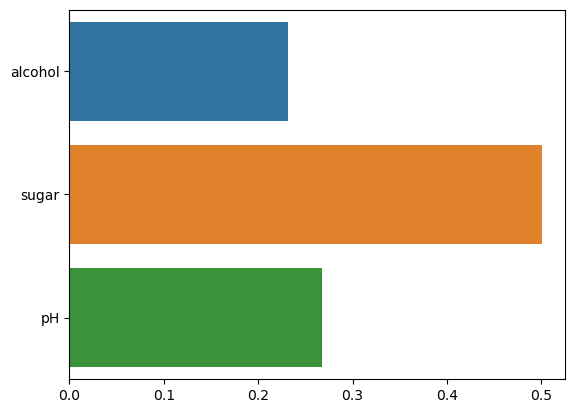

In [9]:
import seaborn as sns
feature_names = ['alcohol', 'sugar', 'pH']
# reature 별 importance 매핑
for name, value in zip(feature_names, rf.feature_importances_):
    print('{0} : {1:3f}'.format(name, value))
#feature importance 를 column 별로 시각화하기
sns.barplot(x = rf.feature_importances_, y=feature_names)

In [10]:
# out of bag 샘플(검증 세트의 역할)  oob_score = True
rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


#### 장단점과 매개변수
* 회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
* 랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.
* 기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하는 장점은 가지고 있다.
* 대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수있다.
* n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할  수 있다.
(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)

## 엑스트라 트리
* 부트스트랩 샘플을 사용하지 않는다. 
* 각 결정트리를 만들 때 전체 샘플을 사용
* 노드 분할 시 가장 좋은 분할을 찾는 것이 아니라 무작위 분할
* 무작위 분할하므로 성능은 낮아지지만, 많은 트리를 앙상블
    * 과대적합을 막고 검증 세트의 점수를 높이는 효과가 있다. 

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state= 42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [12]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


## 그레이디언트 부스팅
* 그래디언트 부스팅 회귀 트리는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 기법이다.
* 이름이 회귀지만 회귀/분류 모두 사용할 수 있다.
* 랜덤 포레스트와 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다. 기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다.
* 대신 강력한 사전 가지치기가 사용된다.
* 그래디언트 부스팅 트리는 머신러닝 경연 대회에서 우승을 많이 차지하였고, 업계에서도 널리 사용된다.
* 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 높은 정확도를 제공해준다.

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score = True, n_jobs = -1 )

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#아래 결과에서 보면 과대적합 되지 않음

0.8881086892152563 0.8720430147331015


In [20]:
# n_estimators = 500 : 트리를 500개 만듬, learning_rate = 0.2 : 학습률(기본값 0.1)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state = 42)

scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 아래 결과에서 보면 과대적합

0.9464595437171814 0.8780082549788999


In [21]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


## 히스토그램 기반 그래디언트 부스팅
* 정형 데이터를 다루는 ML 알고리즘 중 인기가 높음
* 훈련데이터를 256개 구간으로 잘라서 빠르게 학습
* 255개 구간으로 나누고 누락된 값은 떼어놓은 1개로 사용

In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# gb 보다 성능이좋다.

0.9321723946453317 0.8801241948619236


In [29]:
# n_repeats = 10 (10번 돌려서. 기본값 5)
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10, random_state = 42, n_jobs = -1)

print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


In [30]:
result = permutation_importance(hgb, test_input, test_target, n_repeats = 10, random_state = 42, n_jobs = -1 )
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


### XGboost
* pip install xgboost

In [42]:
# tree_method = 'hist ': 히스토그램 매개변수
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score = True, n_jobs = -1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    #과대적합. 

0.9555033709953124 0.8799326275264677


### LightGBM
* MS 에서 만든 LightGBM --> 인기가 점점 높아지고 있는 모델
* pip install lightgbm

In [41]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
